# Cassava Leaf Disease Classification

**Problem Statement:-** 
Existing methods of disease detection for cassava leaf require farmers to solicit the help of government-funded agricultural experts to visually inspect and diagnose the plants. This suffers from being labor-intensive, low-supply and costly. As an added challenge, effective solutions for farmers must perform well under significant constraints, since African farmers may only have access to mobile-quality cameras with low-bandwidth.

In this competition, we introduce a dataset of 21,367 labeled images collected during a regular survey in Uganda. Most images were crowdsourced from farmers taking photos of their gardens, and annotated by experts at the National Crops Resources Research Institute (NaCRRI) in collaboration with the AI lab at Makerere University, Kampala. This is in a format that most realistically represents what farmers would need to diagnose in real life.

Our task is to classify each cassava image into four disease categories or a fifth category indicating a healthy leaf. With our model, farmers may be able to quickly identify diseased plants, potentially saving their crops before they inflict irreparable damage.

The labels are :
1. "0":string"Cassava Bacterial Blight (CBB)"
2. "1":string"Cassava Brown Streak Disease (CBSD)"
3. "2":string"Cassava Green Mottle (CGM)"
4. "3":string"Cassava Mosaic Disease (CMD)"
5. "4":string"Healthy"


# Coding 

### Importing important libraries

The main library used for Image classification is keras and tensorflow. Also, os library used for accessing the files from directories and cv2 was used for image reading and processing. 

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob
import os

### Mounting the drive with colab

We have stored all the zip files in google drive and from there we can access the files by mounting the colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
cd gdrive/MyDrive/EE769

/content/gdrive/MyDrive/EE769


In [ ]:
!ls

cassava-leaf-disease-classification.zip  Data


In [ ]:
!mkdir Data

### Unzipping of data files

In [ ]:
! unzip cassava-leaf-disease-classification.zip -d Data

Streaming output truncated to the last 5000 lines.
  inflating: Data/train_images/3954399974.jpg  
  inflating: Data/train_images/3954487465.jpg  
  inflating: Data/train_images/3954910918.jpg  
  inflating: Data/train_images/3955391972.jpg  
  inflating: Data/train_images/3955442838.jpg  
  inflating: Data/train_images/3955739563.jpg  
  inflating: Data/train_images/3955931830.jpg  
  inflating: Data/train_images/3955972139.jpg  
  inflating: Data/train_images/3956075690.jpg  
  inflating: Data/train_images/3956077728.jpg  
  inflating: Data/train_images/3956155774.jpg  
  inflating: Data/train_images/3956271103.jpg  
  inflating: Data/train_images/3956372146.jpg  
  inflating: Data/train_images/3956407201.jpg  
  inflating: Data/train_images/3956550570.jpg  
  inflating: Data/train_images/3956605397.jpg  
  inflating: Data/train_images/3956778160.jpg  
  inflating: Data/train_images/3957562076.jpg  
  inflating: Data/train_images/3957612771.jpg  
  inflating: Data/train_images/395780

In [ ]:
cd Data

/content/gdrive/MyDrive/EE769/Data


In [ ]:
!ls

dataset			       test_images     train_images
label_num_to_disease_map.json  test_tfrecords  train_tfrecords
sample_submission.csv	       train.csv


In [ ]:
cd train_images/

/content/gdrive/MyDrive/EE769/Data/train_images


## Data Visualization and EDA

Number of training Images

In [ ]:
count = 0
for name in glob.glob("*.jpg"):
    count = count + 1
print(count)

21397


So, there are total 21,397 training images present.

In [ ]:
!ls

1000015157.jpg	1764594695.jpg	2518671335.jpg	3299560037.jpg	4081836555.jpg
1000201771.jpg	1764927533.jpg	2519147193.jpg	3299747121.jpg	4082024517.jpg
100042118.jpg	1764971103.jpg	2519456872.jpg	329996274.jpg	4082420465.jpg
1000723321.jpg	1765114818.jpg	2519536403.jpg	3299964343.jpg	4082694328.jpg
1000812911.jpg	1765190680.jpg	2519700384.jpg	3300292911.jpg	4083175669.jpg
1000837476.jpg	176531736.jpg	2520465654.jpg	3300470808.jpg	4083517071.jpg
1000910826.jpg	1765348139.jpg	2520536047.jpg	3300523135.jpg	408355226.jpg
1001320321.jpg	1765374655.jpg	2520567878.jpg	3300885184.jpg	4083589127.jpg
1001723730.jpg	1765947311.jpg	2520575801.jpg	3300973155.jpg	4083644073.jpg
1001742395.jpg	1766436653.jpg	2520781924.jpg	330151252.jpg	4083711449.jpg
1001749118.jpg	1766917625.jpg	2520798009.jpg	3301514895.jpg	4083726805.jpg
100204014.jpg	1766960814.jpg	2520828282.jpg	3301703643.jpg	4083737751.jpg
1002088496.jpg	176734204.jpg	2520831403.jpg	3301808128.jpg	4083768019.jpg
1002255315.jpg	1767778795.jpg	25

### Dimension of Image

We are going to choose a random image to see the dimension of the image as well as if its a gray scale or rgb image. Other images are given are of same dimensions.

In [ ]:
img = cv2.imread('3298543306.jpg')
dimensions = img.shape
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
 
print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (600, 800, 3)
Image Height       :  600
Image Width        :  800
Number of Channels :  3


Here, we can see that size of the image is 800*600 and since numbers of channels are 3 so it is an RGB image.

In [ ]:
!mkdir dataset

In [ ]:
!ls

dataset			       test_images     train_images
label_num_to_disease_map.json  test_tfrecords  train_tfrecords
sample_submission.csv	       train.csv


### Converting the labels in One Hot Vector

In [ ]:
data = pd.read_csv('train.csv')
data = pd.DataFrame(data,columns=['label'])
final_data = np.zeros((len(data),5))

def transform_data(x):
  final_data[x.name][x['label']] = 1

data.apply(transform_data,axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
21392    None
21393    None
21394    None
21395    None
21396    None
Length: 21397, dtype: object

In [ ]:
print(final_data)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
cd dataset/

/content/gdrive/My Drive/EE769/Data/dataset


In [ ]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [ ]:
!ls

0  1  2  3  4


In [ ]:
cd ..

/content/gdrive/My Drive/EE769/Data


### Putting data in directories labelwise

We are making different directory and putting data labelwise because handling all the images together puts a lot of burden on RAM of colab and which leads to crashing of RAM of colab. Also, it makes data visualization more easier. 

In [ ]:
import shutil
data=pd.read_csv('train.csv')
data=pd.DataFrame(data)   

def transform(x):
    path='train_images/'+x['image_id']
    final_dir=x['label']
    shutil.copy(path,'dataset/'+str(final_dir)+'/')
    
data.apply(transform,axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
21392    None
21393    None
21394    None
21395    None
21396    None
Length: 21397, dtype: object

In [ ]:
import tensorflow_datasets as tfds
builder = tfds.ImageFolder('dataset')
ds = builder.as_dataset(shuffle_files=True)

In [ ]:
cd dataset/

/content/gdrive/My Drive/EE769/Data/dataset


### Counting the labelwise files 

In [ ]:
count = []
sum = 0
d = ["0","1","2","3","4"]
for item in d:
  for path in os.listdir(item):
    if os.path.isfile(os.path.join(item, path)):
        sum += 1
  count.append(sum)
  sum = 0
print(count)

[1021, 2050, 2256, 12375, 2427]


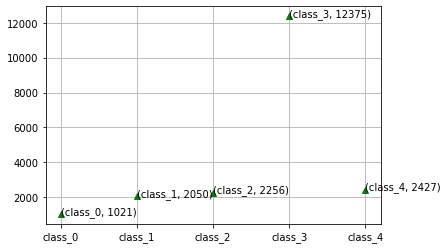

In [ ]:
x = ['class_0','class_1','class_2','class_3','class_4']
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x,count,'g^')
for xy in zip(x, count):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') 

plt.grid()
plt.show()

In [ ]:
!ls

0  1  2  3  4


### Visualizing some images with their labels 

In the dataset directory the images are available in the batches of size 32. When we access a batch it provides us images randomly.

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
)


leaf_data = img_gen.flow_from_directory('dataset')
images, labels = next(leaf_data)

print(images.shape)
print(labels.shape)

Found 20129 images belonging to 5 classes.
(32, 256, 256, 3)
(32, 5)


We are using imshow library of matplotlib to show the images.

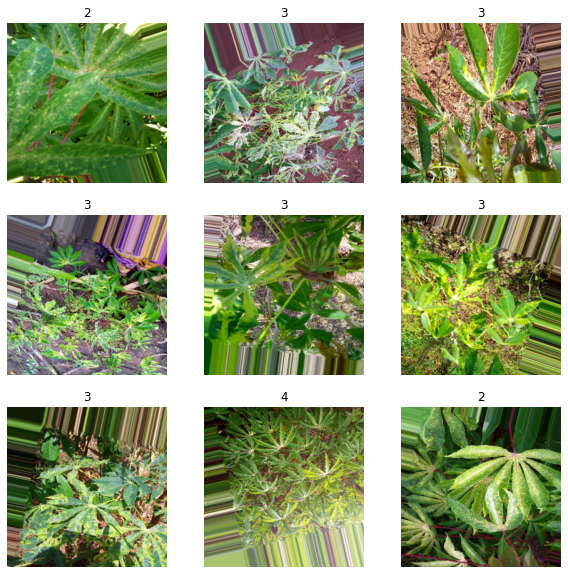

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    index = [index for index, each_item in enumerate(labels[i]) if each_item]
    plt.title(list(leaf_data.class_indices.keys())[index[0]])
    plt.axis("off")

# Training and Validation

### Seperating dataset into training and validation dataset 

Here, we are seperating dataset into training and validation dataset with 80% being training and 20% being validation dataset.

In [ ]:
# Training Dataset
ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='training',validation_split=0.2,image_size=(128,128))
print(ds)
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='validation',validation_split=0.2,image_size=(128,128))

print(ds.class_names)

Found 20129 files belonging to 5 classes.
Using 16104 files for training.
<BatchDataset shapes: ((None, 128, 128, 3), (None, 5)), types: (tf.float32, tf.float32)>
Found 20129 files belonging to 5 classes.
Using 4025 files for validation.
['0', '1', '2', '3', '4']


### Applying first CNN Model

The main keypoints are:
1. Resizing the image shapr to 128*128 since image size was too large and it was leading to crash the RAM on applying higher layers of convolution, also the time taken for each epoch was too high. We are expecting here that we wont lose much significant information here.
2. We are using 3 Convolution layer with layers of 64, 128, 128 respectively with a kernel of size 3*3 and padding.
3. We used relu activation in each of the convolution layer.
4. We also used L2 regularisation in 2nd and 3rd layer of convolution layer to avoid overfitting.
5. We used max pooling layer after every convolution layer to reduce the size.
6. Then we flat the output from the convolution layer to feed it in fully connected(FC) neural network.
7. Our FC neural network contains 2 dense layers with 96 and 12 neurons respectively with relu activation. Also contain one dense layer with softmax activation to give output a 5*1 matrix.
8. This model was complied and then our data was fitted into the model.

In [ ]:
# Applying CNN to train the Model
from keras import layers
from keras.models import Sequential

tf.random.set_seed(1234)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128, 3)),
  # First Convolution Layer
  layers.Conv2D(64, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # Second Convolution Layer
  layers.Conv2D(128, 3, padding='same',kernel_initializer='random_normal', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  # 3rd Convolution Layer
  layers.Conv2D(128, 3, padding='same',kernel_initializer='random_normal', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  layers.MaxPooling2D(),

  # Flat layer
  layers.Flatten(),
  # layers.Dense(768, activation='relu'),
  # layers.Dense(500, activation='relu'),
  # layers.Dense(384, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  # First Dense Layer
  layers.Dense(96, activation='relu'),
  # layers.Dense(24, activation='relu'),
  # Second Dense Layer
  layers.Dense(12, activation='relu'),
  # Third Dense Layer
  layers.Dense(5, activation='softmax')
])

Found 20129 files belonging to 5 classes.
Using 16104 files for training.
<BatchDataset shapes: ((None, 128, 128, 3), (None, 5)), types: (tf.float32, tf.float32)>
Found 20129 files belonging to 5 classes.
Using 4025 files for validation.
['0', '1', '2', '3', '4']


In [ ]:
# Printing model Summery
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

### Results

For model compilation Catagorical Cross Entropy loss was taken and Catagorical accuracy was recorded in each epoch. We also choose Adam optimizer.

In [ ]:
# Compilation and Fitting of model to check loss and categorical accuracy
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.CategoricalAccuracy(),optimizer=tf.keras.optimizers.Adam())
h = model.fit(ds,epochs=10,validation_data=val_ds)

Epoch 1/10
504/504 [==============================] - 6091s 12s/step - loss: 3.1904 - categorical_accuracy: 0.6001 - val_loss: 1.1835 - val_categorical_accuracy: 0.6075
Epoch 2/10
504/504 [==============================] - 1350s 3s/step - loss: 1.1156 - categorical_accuracy: 0.6317 - val_loss: 1.0914 - val_categorical_accuracy: 0.6089
Epoch 3/10
504/504 [==============================] - 1350s 3s/step - loss: 1.0261 - categorical_accuracy: 0.6412 - val_loss: 1.0507 - val_categorical_accuracy: 0.6194
Epoch 4/10
504/504 [==============================] - 1340s 3s/step - loss: 0.9798 - categorical_accuracy: 0.6507 - val_loss: 1.0327 - val_categorical_accuracy: 0.6243
Epoch 5/10
504/504 [==============================] - 1349s 3s/step - loss: 0.9617 - categorical_accuracy: 0.6568 - val_loss: 0.9800 - val_categorical_accuracy: 0.6373
Epoch 6/10
504/504 [==============================] - 1331s 3s/step - loss: 0.9416 - categorical_accuracy: 0.6625 - val_loss: 0.9497 - val_categorical_accuracy

After running 10 epochs it was noticed that the validation catagorical accuracy was observed by 66.53%

### Plotting of Validation loss and validation accuracy

In [ ]:
l = h.history['loss']
val_l = h.history['val_loss']
cat_acc = h.history['categorical_accuracy']
val_cat_acc = h.history['val_categorical_accuracy']

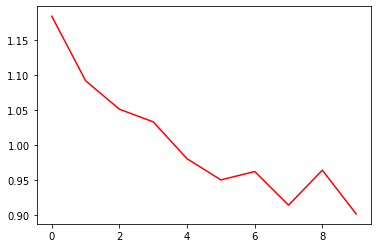

In [ ]:
plt.plot(val_l, 'r')

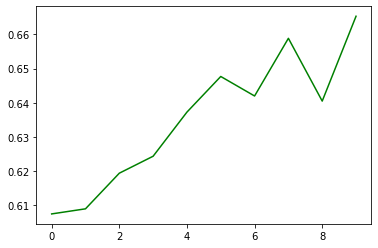

In [ ]:
plt.plot(val_cat_acc, 'g')

# Experiments with different models

Since the accuracy of the first model wasn't very satisfactory so we tried to experiments with different models by changing the parameters such as 
 

*   Activation function
*   Number of convolution layer 
*   Size of dense layer
*   Adding or removing regularisation
*   Adding Dropout layer
*   Changing image size etc...



## Model 2 

In this model we have added one additional convolution layer, however to reduce epoch timing we have reduced the size of convolution layer. We have also removed the regularisation in this model. After running 20 epochs validation accuracy and validation loss was recorded and plotted.

In [ ]:
# Applying CNN to train the Model
from keras import layers
from keras.models import Sequential
tf.random.set_seed(1234)

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)),
  # First Convolution Layer
  layers.Conv2D(8, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # Second Convolution Layer
  layers.Conv2D(16, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 3rd Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 4th Convolution Layer
  layers.Conv2D(64, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  
  # Flatting output
  layers.Flatten(),

  # Dense Layers
  
  # First Dense Layer
  layers.Dense(48, activation='relu'),
  # layers.Dense(24, activation='relu'),
  # Second Dense Layer
  layers.Dense(12, activation='relu'),
  # Third Dense Layer
  layers.Dense(5, activation='softmax')
])

# Compilation and Fitting of model to check loss and categorical accuracy
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.CategoricalAccuracy(),optimizer=tf.keras.optimizers.Adam())
h1 = model1.fit(ds,epochs=20,validation_data=val_ds)

Epoch 1/20
504/504 [==============================] - 4845s 9s/step - loss: 1.2815 - categorical_accuracy: 0.6080 - val_loss: 1.1594 - val_categorical_accuracy: 0.5965
Epoch 2/20
504/504 [==============================] - 261s 516ms/step - loss: 1.0735 - categorical_accuracy: 0.6264 - val_loss: 1.0918 - val_categorical_accuracy: 0.6109
Epoch 3/20
504/504 [==============================] - 262s 517ms/step - loss: 1.0074 - categorical_accuracy: 0.6350 - val_loss: 1.0039 - val_categorical_accuracy: 0.6221
Epoch 4/20
504/504 [==============================] - 244s 483ms/step - loss: 0.9652 - categorical_accuracy: 0.6435 - val_loss: 0.9723 - val_categorical_accuracy: 0.6221
Epoch 5/20
504/504 [==============================] - 243s 479ms/step - loss: 0.9344 - categorical_accuracy: 0.6505 - val_loss: 0.9553 - val_categorical_accuracy: 0.6445
Epoch 6/20
504/504 [==============================] - 252s 498ms/step - loss: 0.9050 - categorical_accuracy: 0.6660 - val_loss: 0.9261 - val_categorical

Training loss is measured during each epoch while validation loss is measured after each epoch

### Plotting 

We have plotted training and validation accuracies and losses with each epoch.

In [ ]:
l1 = h1.history['loss']
val_l1 = h1.history['val_loss']
cat_acc1 = h1.history['categorical_accuracy']
val_cat_acc1 = h1.history['val_categorical_accuracy']

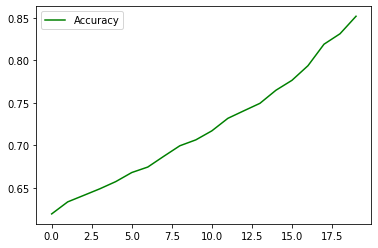

In [ ]:
plt.plot(cat_acc1, 'g', label='Accuracy')
plt.legend()

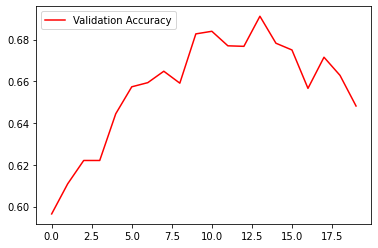

In [ ]:
plt.plot(val_cat_acc1, 'r', label='Validation Accuracy')
plt.legend()

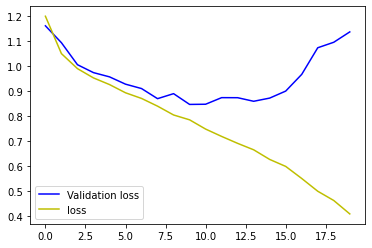

In [ ]:
plt.plot(val_l1, 'b',label='Validation loss')
plt.plot(l1, 'y', label='loss')
plt.legend()

It was noticed that at start validation accuracy started to rise and even reaches 69.12 % which is better than the model 1. However after that validation loss starting to rise and model starting to get overfit.

## Model 3

In this model we have tried to change the size of the image and also reduced one convolution layer. The size of image choosen was 256*256.

In [ ]:
# Training Dataset
ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='training',validation_split=0.2,image_size=(256,256))
print(ds)
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='validation',validation_split=0.2,image_size=(256,256))

print(ds.class_names)
# Applying CNN to train the Model
from keras import layers
from keras.models import Sequential

tf.random.set_seed(1234)
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  # First Convolution Layer
  layers.Conv2D(16, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # Second Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 3rd Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 4th Convolution Layer
  # layers.Conv2D(64, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  # layers.MaxPooling2D(),
  
  # Flatting output
  layers.Flatten(),

  # Dense Layers

  # First Dense Layer
  layers.Dense(48, activation='relu'),
  # Second Dense Layer
  layers.Dense(12, activation='relu'),
  # Third Dense Layer
  layers.Dense(5, activation='softmax')
])

# Compilation and Fitting of model to check loss and categorical accuracy
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.CategoricalAccuracy(),optimizer=tf.keras.optimizers.Adam())
h2 = model2.fit(ds,epochs=10,validation_data=val_ds)

Found 20129 files belonging to 5 classes.
Using 16104 files for training.
<BatchDataset shapes: ((None, 256, 256, 3), (None, 5)), types: (tf.float32, tf.float32)>
Found 20129 files belonging to 5 classes.
Using 4025 files for validation.
['0', '1', '2', '3', '4']
Epoch 1/10
504/504 [==============================] - 5137s 10s/step - loss: 1.1269 - categorical_accuracy: 0.6184 - val_loss: 1.0300 - val_categorical_accuracy: 0.6089
Epoch 2/10
504/504 [==============================] - 1045s 2s/step - loss: 0.9646 - categorical_accuracy: 0.6417 - val_loss: 0.9224 - val_categorical_accuracy: 0.6472
Epoch 3/10
504/504 [==============================] - 1051s 2s/step - loss: 0.8766 - categorical_accuracy: 0.6719 - val_loss: 0.9433 - val_categorical_accuracy: 0.6522
Epoch 4/10
504/504 [==============================] - 1073s 2s/step - loss: 0.7934 - categorical_accuracy: 0.6937 - val_loss: 1.0145 - val_categorical_accuracy: 0.5856
Epoch 5/10
504/504 [==============================] - 1044s 2s/

### Plotting 

We have plotted training and validation accuracies and losses with each epoch.

In [ ]:
l2 = h2.history['loss']
val_l2 = h2.history['val_loss']
cat_acc2 = h2.history['categorical_accuracy']
val_cat_acc2 = h2.history['val_categorical_accuracy']

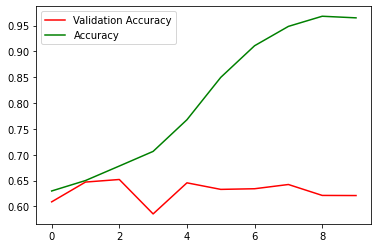

In [ ]:
plt.plot(val_cat_acc2, 'r', label='Validation Accuracy')
plt.plot(cat_acc2, 'g', label='Accuracy')
plt.legend()

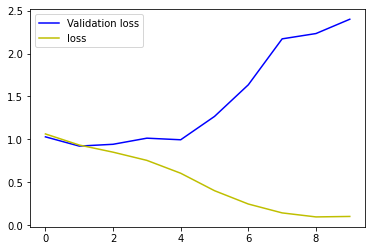

In [ ]:
plt.plot(val_l2, 'b',label='Validation loss')
plt.plot(l2, 'y', label='loss')
plt.legend()

It was noticed that with increasing in the image size the model tends to overfit faster than the previous models. Also, there wasnt much significant change in the accuracy observed.

### Model 4

In this model we have changed the activation function from relu to LeakyReLU with alpha being 0.1.

In [ ]:
# Training Dataset
ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='training',validation_split=0.2,image_size=(256,256))
print(ds)
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='validation',validation_split=0.2,image_size=(256,256))
print(ds.class_names)

# Applying CNN to train the Model
from keras import layers
from keras.models import Sequential

tf.random.set_seed(1234)
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  # First Convolution Layer
  layers.Conv2D(16, 3, padding='same',kernel_initializer='random_normal', activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  layers.MaxPooling2D(),
  # Second Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  layers.MaxPooling2D(),
  # 3rd Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  layers.MaxPooling2D(),
  
  # Flatting output
  layers.Flatten(),

  # Dense Layers
  # First Dense Layer
  layers.Dense(48, activation='relu'),
  # Second Dense Layer
  layers.Dense(12, activation='relu'),
  # Third Dense Layer
  layers.Dense(5, activation='softmax')
])

# Compilation and Fitting of model to check loss and categorical accuracy
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.CategoricalAccuracy(),optimizer=tf.keras.optimizers.Adam())
h3 = model3.fit(ds,epochs=10,validation_data=val_ds)

Found 20129 files belonging to 5 classes.
Using 16104 files for training.
<BatchDataset shapes: ((None, 256, 256, 3), (None, 5)), types: (tf.float32, tf.float32)>
Found 20129 files belonging to 5 classes.
Using 4025 files for validation.
['0', '1', '2', '3', '4']
Epoch 1/10
504/504 [==============================] - 1087s 2s/step - loss: 1.1635 - categorical_accuracy: 0.6180 - val_loss: 1.0439 - val_categorical_accuracy: 0.6084
Epoch 2/10
504/504 [==============================] - 1064s 2s/step - loss: 0.9900 - categorical_accuracy: 0.6407 - val_loss: 0.9271 - val_categorical_accuracy: 0.6390
Epoch 3/10
504/504 [==============================] - 1058s 2s/step - loss: 0.8864 - categorical_accuracy: 0.6712 - val_loss: 0.8789 - val_categorical_accuracy: 0.6596
Epoch 4/10
504/504 [==============================] - 1053s 2s/step - loss: 0.8032 - categorical_accuracy: 0.7002 - val_loss: 0.9447 - val_categorical_accuracy: 0.6435
Epoch 5/10
504/504 [==============================] - 1060s 2s/s

Here also we can see that the maximum accuracy was achieved is around 66%. Also, the model is overfitting very quickly.

## Testing a model for plotting classification report and confusion matrix

### Model 5

Here, we are using a simple model to check and print out classification report and plot a confusion matrix.

In [ ]:
# Training Dataset
ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='training',validation_split=0.2,image_size=(128,128))
print(ds)
# Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory('dataset',seed=0,label_mode='categorical',subset='validation',validation_split=0.2,image_size=(128,128))

print(ds.class_names)

Found 20129 files belonging to 5 classes.
Using 16104 files for training.
<BatchDataset shapes: ((None, 128, 128, 3), (None, 5)), types: (tf.float32, tf.float32)>
Found 20129 files belonging to 5 classes.
Using 4025 files for validation.
['0', '1', '2', '3', '4']


In [ ]:
# Applying CNN to train the Model
from keras import layers
from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
tf.random.set_seed(1234)
model4 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)),
  # First Convolution Layer
  layers.Conv2D(16, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 2nd Convolution Layer
  layers.Conv2D(32, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  # 3rd Convolution Layer
  layers.Conv2D(64, 3, padding='same',kernel_initializer='random_normal', activation='relu'),
  layers.MaxPooling2D(),
  
  # Flatting output
  layers.Flatten(),

  # Dense Layers
  # First Dense Layer
  layers.Dense(48, activation='relu'),
  # Second Dense Layer
  layers.Dense(12, activation='relu'),
  # Third Dense Layer
  layers.Dense(5, activation='softmax')
])

# Compilation and Fitting of model to check loss and categorical accuracy
model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),metrics=tf.keras.metrics.CategoricalAccuracy(),optimizer=tf.keras.optimizers.Adam())
h4 = model4.fit(ds,epochs=5,validation_data=val_ds)

Epoch 1/5
504/504 [==============================] - 5275s 10s/step - loss: 1.1188 - categorical_accuracy: 0.6167 - val_loss: 1.0780 - val_categorical_accuracy: 0.6092
Epoch 2/5
504/504 [==============================] - 360s 712ms/step - loss: 1.0039 - categorical_accuracy: 0.6341 - val_loss: 0.9882 - val_categorical_accuracy: 0.6256
Epoch 3/5
504/504 [==============================] - 347s 685ms/step - loss: 0.9374 - categorical_accuracy: 0.6509 - val_loss: 0.9937 - val_categorical_accuracy: 0.6365
Epoch 4/5
504/504 [==============================] - 346s 685ms/step - loss: 0.8924 - categorical_accuracy: 0.6665 - val_loss: 0.9675 - val_categorical_accuracy: 0.6278
Epoch 5/5
504/504 [==============================] - 340s 672ms/step - loss: 0.8475 - categorical_accuracy: 0.6801 - val_loss: 0.8917 - val_categorical_accuracy: 0.6648


After running this model for 5 epoch we got an accuracy of around 66.48 %. Now we would want to make a classification report of this model and see the confusion matrix.

In [ ]:
val_ds1 = val_ds

In [ ]:
# Storing the actual validation lables in an array
j = []
d = []
preds1 = []
for data, labels in (val_ds1):
    j.append(labels)
    d.append(data)
    preds1.append(model4.predict(data))  # putting the data of the validation dataset into model for prediction

index_max_act = []
datak = []
for i in range(125):
  for k in range(32):
    index_max_act.append(np.argmax(j[i][k]))
    datak.append(d[i][k])

for k in range(25):
    index_max_act.append(np.argmax(j[125][k]))
    datak.append(d[125][k])



In [ ]:
# Store the predicted labels in an array
index_max_pred = []
for i in range(125):
  for k in range(32):
    index_max_pred.append(np.argmax(preds1[i][k]))

for k in range(25):
  index_max_pred.append(np.argmax(preds1[125][k]))

In [ ]:
# Printing the actual and predicted labels
print(index_max_act)
print(index_max_pred)

[3, 3, 3, 3, 4, 3, 1, 3, 1, 4, 3, 1, 3, 3, 4, 3, 3, 1, 3, 4, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 4, 3, 4, 3, 0, 4, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 2, 2, 1, 4, 3, 2, 1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 4, 1, 3, 3, 3, 1, 4, 2, 3, 3, 3, 0, 2, 4, 3, 3, 3, 1, 3, 3, 4, 3, 1, 0, 3, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 2, 0, 0, 3, 4, 3, 4, 1, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 4, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 4, 3, 3, 2, 3, 2, 3, 3, 4, 4, 3, 3, 3, 4, 1, 3, 3, 2, 1, 3, 3, 0, 3, 0, 4, 4, 3, 0, 3, 4, 3, 3, 3, 3, 3, 3, 1, 2, 0, 3, 3, 3, 4, 2, 0, 3, 4, 2, 3, 4, 3, 1, 3, 2, 4, 4, 0, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 4, 3, 3, 3, 1, 1, 4, 1, 1, 2, 2, 3, 3, 3, 3, 3, 1, 4, 3, 3, 1, 2, 3, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4, 4, 1, 3, 2, 4, 4, 3, 4, 3, 2, 2, 3, 3, 0, 4, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 4, 3, 3, 0, 3, 4, 4, 1, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 4, 

In [ ]:
# Making a classification report of our prediction
from sklearn.metrics import classification_report
y_true = index_max_act
y_pred = index_max_pred
target_names = val_ds.class_names
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.43      0.31      0.36       224
           1       0.41      0.37      0.38       402
           2       0.42      0.09      0.15       493
           3       0.73      0.96      0.83      2378
           4       0.50      0.25      0.33       528

    accuracy                           0.66      4025
   macro avg       0.50      0.39      0.41      4025
weighted avg       0.61      0.66      0.61      4025



### Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  import matplotlib.pyplot as plt
  import numpy as np
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
      cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(8, 6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      if normalize:
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
      else:
          plt.text(j, i, "{:,}".format(cm[i, j]),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

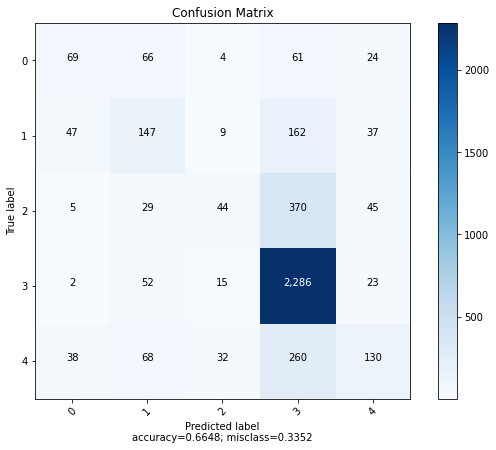

In [ ]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix")

Here on confusion matrix we can see that we are classifying 66.48% of the labels correctly which is also the same as the model accuracy that we got after running 5 epochs.

### Test dataset

We have test data files in the form of a tfreords file, however the file contains only 1 image. We have tried to predict the label of the image.

In [ ]:
cd test_tfrecords/

/content/gdrive/My Drive/EE769/Data/test_tfrecords


In [ ]:
test_ds = tf.data.TFRecordDataset('ld_test00-1.tfrec')


In [ ]:
# Reading the test data files 
for example in tf.compat.v1.python_io.tf_record_iterator("ld_test00-1.tfrec"):
    print(tf.train.Example.FromString(example))

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\001\001,\001,\000\000\377\333\000C\000\002\001\001\001\001\001\002\001\001\001\002\002\002\002\002\004\003\002\002\002\002\005\004\004\003\004\006\005\006\006\006\005\006\006\006\007\t\010\006\007\t\007\006\006\010\013\010\t\n\n\n\n\n\006\010\013\014\013\n\014\t\n\n\n\377\333\000C\001\002\002\002\002\002\002\005\003\003\005\n\007\006\007\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\377\300\000\021\010\002\000\002\000\003\001\021\000\002\021\001\003\021\001\377\304\000\036\000\000\002\003\001\001\001\001\001\001\000\000\000\000\000\000\000\006\007\004\005\010\t\003\002\001\000\n\377\304\000O\020\000\001\003\003\003\002\004\004\004\003\006\004\003\006\001\r\001\002\003\004\005\006\021\000\007\022\010!\023\"1A\t\024Qa\025#2qB

In [ ]:
cd ..

/content/gdrive/My Drive/EE769/Data


In [ ]:
cd test_images

/content/gdrive/My Drive/EE769/Data/test_images


In [ ]:
test_data = cv2.imread("2216849948.jpg")

In [ ]:
test_data.shape

(600, 800, 3)

In [ ]:
output = cv2.resize(test_data, (128,128))

In [ ]:
output = output.reshape(1, 128, 128, 3)

In [ ]:
preds2 = model4.predict(output)

In [ ]:
print(preds2)

[[0.03760135 0.06492715 0.13583389 0.59920853 0.16242902]]


So our model predicted output image as label 3 with model 4.

### Conclusion


*   Currently we are getting an accuracy of around 65-69%.
*   The reason for low accuracy might be because we are reducing the size of the image a lot to avoid crashing of RAM and also reducing time of computation but by doing so we might be loosing some valuable features.
*   We are able to make limited changes in our model for testing because of the time constraints, there are further changes which can be done to improve accuracy whihc includes 
1. Taking full image size for making model.
2. Increasing Complexity of CNN model by using more convolution layers.
3. Increase the dataset by reshaping and rotating the image files.
4. Doing more experiments on regularisations(using dropout,batch normalization layers and changing regularisation coefficient), changing activations, and varying the size of the dense layers.
5. We can corrupt some of our input to force our network to learn and pick up important features.



# Refrences
1. https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
2. https://www.kaggle.com/c/cassava-leaf-disease-classification/data
3. https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37
4. https://github.com/datitran/raccoon_dataset/issues/90
5. https://towardsdatascience.com/how-to-train-an-image-classifier-on-tfrecord-files-97a98a6a1d7a
6. https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
7. https://stackoverflow.com/questions/37020754/how-to-increase-validation-accuracy-with-deep-neural-net